# Decision Tree Classification and Random Forest
#### Rick Gosalvez, 2021 Data Mining

# Theory

## 1. Decision Tree Diagram

### 1a. Tree diagram - rules, # data, # of classes

<b>NOTE:</b> Diagram includes decisions for adding 1 rule (1b) for a total of 7 rules and deleting a branch (1c)

![Decision Tree Diagram](img/HW4_Q1a.png)

### 1b. Best place to add one line (decision)

Upon visual inspection, the <b>best place to add a line would be at x <= 3.5</b>, which would result in 2 'pure' splits.

![Decision Tree Diagram](img/HW4_Q1b.png)

### 1c. Best place to delete one line (decision)

Based on visual inspection, I'd <b>delete Y<=4</b> becauses it appears 'overfit.' Other rules appear to split data as to help classify objects. This aligns with a Bottoms-Up pruning approach. Alternatively, if we simply look at Information Gain (IG) at each node, we'd question if stopping early at rule Y<=6 would be a good rule to prune; however, looking further down the diagram we would see that it would result in a 'horizon effect' as we would loose a lot of IG for the entire tree verus pruning Y<=4 which is a much smaller IG for the tree and visually looks like overfitting. 

![Decision Tree Diagram](img/HW4_Q1c.png)

Interestingly, based on information gain and visual inspection, <b>another good option</b> would be to re-evaluate the root rule from Y<=3.5 to Y<=4 to improve splits and reduce future overfitting. For example, changing the root rule to y<=4 would improve that outcome and reduce the need to split it later in the tree.

![Decision Tree Diagram](img/HW4_Q1c2.png)

### Information Gain Calculations (gini | entropy): Checking Long-hand

$$gini\;\;\;\;\;\; G(A) = 1- \sum\limits_{k=1}^n p_{k}^2 \;\;\;\;\;\; (low = good, high = bad)$$  

In [1]:
def giniIndex(category, a, b, c, d, e,f):
    GP = 1 - ((a/(a+b))**2) - ((b/(a+b))**2)
    G1 = 1 - ((c/(c+d))**2) - ((d/(c+d))**2)
    G2 = 1 - ((e/(e+f))**2) - ((f/(e+f))**2)
    GC = (((c+d)/(a+b))*G1)+(((e+f)/(a+b))*G2)
    IG = GP - GC
    
    print(category)
    print(f'Total num. of samples: {a+b:.0f}')
    print(f'Root:                  {GP:.3f}')
    print(f'G1:                    {G1:.3f}')
    print(f'G2:                    {G2:.3f}')
    print(f'GC:                    {GC:.3f}')
    print(f'IG:                    {IG:.3f}')
    print()
    
    return float(IG)

### gini Index

In [2]:
g1 = giniIndex('Y',20,22,9,3,11,19)   # level 1 (root node)
g2 = giniIndex('X',9,3,0,2,9,1)       # level 2 
g3 = giniIndex('X',11,19,9,7,2,12)    # level 2 
g4 = giniIndex('Y',9,7,2,3,7,4)       # level 3 > recommended for 1c b/c lowest IG
g5 = giniIndex('Y',2,12,1,0,1,12)     # level 3 
g6 = giniIndex('X',7,4,0,3,7,1)       # level 4
g7 = giniIndex('X',2,3,0,3,2,0)       # level 4 

gini_list = [g1,g2,g3,g4,g5,g6,g7]

print(f'Lowest Information Gain: {min(gini_list):.3f}')
print(f'Highest Information Gain:{max(gini_list):.3f}')

Y
Total num. of samples: 42
Root:                  0.499
G1:                    0.375
G2:                    0.464
GC:                    0.439
IG:                    0.060

X
Total num. of samples: 12
Root:                  0.375
G1:                    0.000
G2:                    0.180
GC:                    0.150
IG:                    0.225

X
Total num. of samples: 30
Root:                  0.464
G1:                    0.492
G2:                    0.245
GC:                    0.377
IG:                    0.088

Y
Total num. of samples: 16
Root:                  0.492
G1:                    0.480
G2:                    0.463
GC:                    0.468
IG:                    0.024

Y
Total num. of samples: 14
Root:                  0.245
G1:                    0.000
G2:                    0.142
GC:                    0.132
IG:                    0.113

X
Total num. of samples: 11
Root:                  0.463
G1:                    0.000
G2:                    0.219
GC:            

### Entropy

$$entropy\;\;\;\;\;\; E(A) = - \sum\limits_{k=1}^n p_{k}log_2(p_k) $$  
$$Information Gain\;\;\;\;\;\; IG = E(Before)\:-\:E(After) \;\;\;\;\;\; (low = bad, high = good)$$ 

In [3]:
import math

def entropy(category, a, b, c, d, e,f):
    if a == 0:
        GP = -0 - (b/(a+b)) * math.log(b/(a+b),2)
    elif b == 0:
        GP = -(a/(a+b)) * math.log(a/(a+b),2) - 0
    else:
        GP = -(a/(a+b)) * math.log(a/(a+b),2) - (b/(a+b)) * math.log(b/(a+b),2)
    if c == 0:
        G1 = -0 - (d/(c+d)) * math.log(d/(c+d),2)
    elif d == 0:
        G1 = -(c/(c+d)) * math.log(c/(c+d),2) - 0
    else:
        G1 = -(c/(c+d)) * math.log(c/(c+d),2) - (d/(c+d)) * math.log(d/(c+d),2)
    if e == 0:
        G2 = -0 - (f/(e+f)) * math.log(f/(e+f),2)
    elif f == 0:
        G2 = -(e/(e+f)) * math.log(e/(e+f),2) - 0
    else:
        G2 = -(e/(e+f)) * math.log(e/(e+f),2) - (f/(e+f)) * math.log(f/(e+f),2)
    
    GC = (((c+d)/(a+b))*G1)+(((e+f)/(a+b))*G2)
    IG = GP - GC
    
    print(category)
    print(f'Total num. of samples: {a+b:.0f}')
    print(f'Root:                  {GP:.3f}')
    print(f'G1:                    {G1:.3f}')
    print(f'G2:                    {G2:.3f}')
    print(f'GC:                    {GC:.3f}')
    print(f'IG:                    {IG:.3f}')
    print()
    
    return float(IG)

In [4]:
e1 = entropy('Y',20,22,9,3,11,19)   # level 1 (root node)
e2 = entropy('X',9,3,0,2,9,1)       # level 2 
e3 = entropy('X',11,19,9,7,2,12)    # level 2 
e4 = entropy('Y',9,7,2,3,7,4)       # level 3 > recommended for 1c b/c lowest IG
e5 = entropy('Y',2,12,1,0,1,12)     # level 3 
e6 = entropy('X',7,4,0,3,7,1)       # level 4
e7 = entropy('X',2,3,0,3,2,0)       # level 4 

entropy_list = [e1,e2,e3,e4,e5,e6,e7]

print(f'Lowest Information Gain: {min(entropy_list):.3f}')
print(f'Highest Information Gain:{max(entropy_list):.3f}')

Y
Total num. of samples: 42
Root:                  0.998
G1:                    0.811
G2:                    0.948
GC:                    0.909
IG:                    0.089

X
Total num. of samples: 12
Root:                  0.811
G1:                    0.000
G2:                    0.469
GC:                    0.391
IG:                    0.420

X
Total num. of samples: 30
Root:                  0.948
G1:                    0.989
G2:                    0.592
GC:                    0.803
IG:                    0.145

Y
Total num. of samples: 16
Root:                  0.989
G1:                    0.971
G2:                    0.946
GC:                    0.954
IG:                    0.035

Y
Total num. of samples: 14
Root:                  0.592
G1:                    -0.000
G2:                    0.391
GC:                    0.363
IG:                    0.228

X
Total num. of samples: 11
Root:                  0.946
G1:                    0.000
G2:                    0.544
GC:           

# Practice

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scikitplot as skplt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier     # not example discussed in class

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc                       # Area under curve for final step in random tree chart

### 1. Load data

In [6]:
df = pd.read_csv('FlightDelaysR.csv')
df.head()

,Unnamed: 0,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,FlightStatus
0,0,15.0,OH,1455,JFK,184,01/01/2004,5935,BWI,0,THU,1,N940CA,0
1,1,16.0,DH,1640,JFK,213,01/01/2004,6155,DCA,0,THU,1,N405FJ,0
2,2,12.0,DH,1245,LGA,229,01/01/2004,7208,IAD,0,THU,1,N695BR,0
3,3,17.0,DH,1709,LGA,229,01/01/2004,7215,IAD,0,THU,1,N662BR,0
4,4,10.0,DH,1035,LGA,229,01/01/2004,7792,IAD,0,THU,1,N698BR,0


### 2. Split input and output

In [7]:
# inputs (5 features)
X=df.iloc[:,[10,1,8,4,9]]
X.keys()

Index(['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'Weather'], dtype='object')

In [8]:
# output/outcome
y=df['FlightStatus']

In [9]:
X.head()

,DAY_WEEK,CRS_DEP_TIME,ORIGIN,DEST,Weather
0,THU,15.0,BWI,JFK,0
1,THU,16.0,DCA,JFK,0
2,THU,12.0,IAD,LGA,0
3,THU,17.0,IAD,LGA,0
4,THU,10.0,IAD,LGA,0


In [10]:
# X = round(X)
# X.describe()

### 3. Make dummy features

In [11]:
# dummy indicator variables
X = pd.get_dummies(X, columns=['DAY_WEEK','CRS_DEP_TIME','ORIGIN', 'DEST', 'Weather',], drop_first=True)
X.head()

,DAY_WEEK_MON,DAY_WEEK_SAT,DAY_WEEK_SUN,DAY_WEEK_THU,DAY_WEEK_TUE,DAY_WEEK_WEN,CRS_DEP_TIME_7.0,CRS_DEP_TIME_8.0,CRS_DEP_TIME_9.0,CRS_DEP_TIME_10.0,...,CRS_DEP_TIME_17.0,CRS_DEP_TIME_18.0,CRS_DEP_TIME_19.0,CRS_DEP_TIME_20.0,CRS_DEP_TIME_21.0,ORIGIN_DCA,ORIGIN_IAD,DEST_JFK,DEST_LGA,Weather_1
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


### 4. Split into test and training

In [12]:
# split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

### 5. Decision Tree Classsifier: gini

In [13]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

In [14]:
y_pred = tree.predict(X_test)

### 6. Confustion Matrix Visual: gini Index

In [15]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],331,24
True[1],65,21


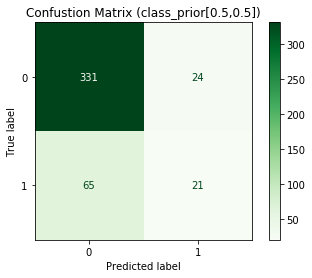

In [16]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Greens)
plt.title('Confustion Matrix (class_prior[0.5,0.5])')
plt.show()

In [17]:
y_pred_p = tree.predict_proba(X_test)
#y_pred_p

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       355
           1       0.47      0.24      0.32        86

    accuracy                           0.80       441
   macro avg       0.65      0.59      0.60       441
weighted avg       0.76      0.80      0.77       441



### 7. ROC curve and Cumulative Gain Charts

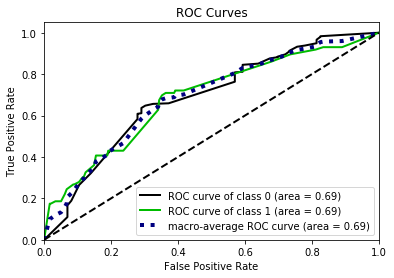

In [19]:
skplt.metrics.plot_roc(y_test, tree.predict_proba(X_test), plot_micro=False)
plt.show()

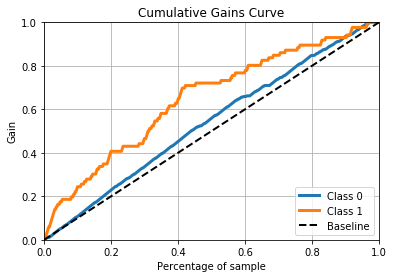

In [20]:
skplt.metrics.plot_cumulative_gain(y_test, tree.predict_proba(X_test))
plt.show()

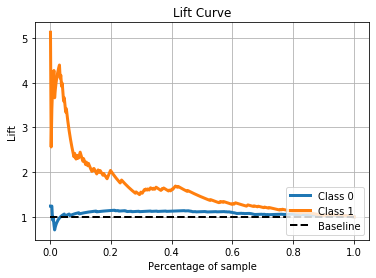

In [21]:
skplt.metrics.plot_lift_curve(y_test, tree.predict_proba(X_test))
plt.show()

### 8. Hypertuning Decision Tree Classsifier

Manually changed max_depth and min_sample_leaf with values ranging from 1 to 99 for default criterion 'gini', then changed criterion to 'entropy'. The BEST result is with criterion 'entropy' hyptertuning to yield an 83% accuracy (below).

Lowering <b>max_depth</b> improves accuracy; however, <b> min_samples_leaf</b>  has no affect on accuracy for this dataset.

#### ANSWER: criterion = 'entropy', max_depth='2', min_sample_leaf='10+' results in the <b>BEST</b> accuracy. Better than default.

* Model from 5 accuracy = 0.80
* Model from 8 accuracy = 0.83

Hyperparameter yields 3% better accurcy over default option from the model in step 5.

In [22]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       random_state=1)

In [23]:
y_pred = tree.predict(X_test)

In [24]:
confmat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['True[0]','True[1]'],
                      columns=['Predict[0]','Predict[1]'])
confmat

,Predict[0],Predict[1]
True[0],355,0
True[1],75,11


### Improved Confustion Matrix Visual: entropy

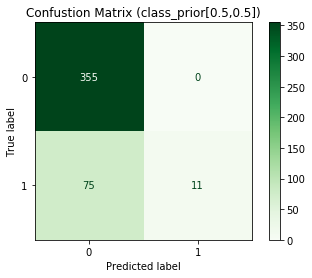

In [25]:
plot_confusion_matrix(tree, X_test, y_test, cmap=plt.cm.Greens)
plt.title('Confustion Matrix (class_prior[0.5,0.5])')
plt.show()

In [26]:
y_pred_p = tree.predict_proba(X_test)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       355
           1       1.00      0.13      0.23        86

    accuracy                           0.83       441
   macro avg       0.91      0.56      0.57       441
weighted avg       0.86      0.83      0.77       441



### 9. Random Forest

              feature  importance       std
19  CRS_DEP_TIME_20.0    0.002060  0.012712
6    CRS_DEP_TIME_7.0    0.002348  0.014355
13  CRS_DEP_TIME_14.0    0.002880  0.018823
20  CRS_DEP_TIME_21.0    0.002995  0.015664
10  CRS_DEP_TIME_11.0    0.003859  0.019521
17  CRS_DEP_TIME_18.0    0.005594  0.029594
4        DAY_WEEK_TUE    0.006656  0.020030
5        DAY_WEEK_WEN    0.006726  0.024205
16  CRS_DEP_TIME_17.0    0.010101  0.037888
11  CRS_DEP_TIME_12.0    0.011485  0.038742
8    CRS_DEP_TIME_9.0    0.011673  0.038155
9   CRS_DEP_TIME_10.0    0.011966  0.041537
15  CRS_DEP_TIME_16.0    0.014577  0.047721
7    CRS_DEP_TIME_8.0    0.016503  0.046186
3        DAY_WEEK_THU    0.019001  0.052123
23           DEST_JFK    0.019093  0.056985
12  CRS_DEP_TIME_13.0    0.029518  0.072729
2        DAY_WEEK_SUN    0.041863  0.090609
14  CRS_DEP_TIME_15.0    0.048145  0.090578
0        DAY_WEEK_MON    0.050457  0.091174
22         ORIGIN_IAD    0.052171  0.091627
18  CRS_DEP_TIME_19.0    0.07480

Text(0, 0.5, '')

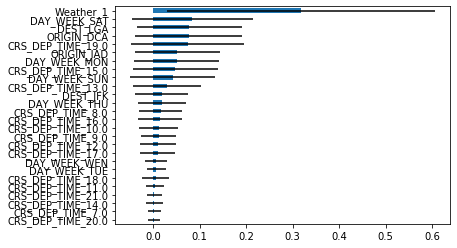

In [28]:
tree   = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=1)
forest = RandomForestClassifier(criterion='entropy', max_depth = 3, n_estimators=500, random_state=1)
# adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=500, random_state=1)   # not covered in class

forest.fit(X_train, y_train)
importances  = forest.feature_importances_
std          = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
df           = pd.DataFrame({'feature':X_train.columns, 'importance': importances, 'std': std})
df           = df.sort_values('importance')

print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

Sensitivity for Decision Tree: 0.163
Accuracy for Decision Tree: 0.810
Sensitivity for Random Forest: 0.128
Accuracy for Random Forest: 0.830


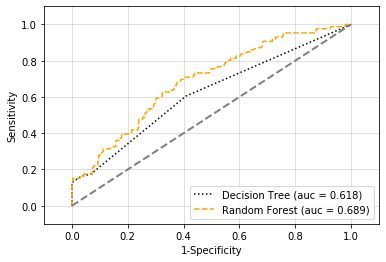

In [29]:
clf_labels  = ['Decision Tree', 'Random Forest']
all_clf      = [tree, forest]

colors       = ['black', 'orange', 'blue', 'green']
linestyles   = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred   = clf.predict_proba(X_test)[:,1]
    y_p      = clf.predict(X_test)
    print('Sensitivity for %s: %.3f' % (label, recall_score(y_true=y_test, y_pred=y_p)))
    print('Accuracy for %s: %.3f' % (label, accuracy_score(y_true=y_test, y_pred=y_p)))
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc  = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.3f)'% (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

              feature  importance       std
19  CRS_DEP_TIME_20.0    0.001264  0.009818
10  CRS_DEP_TIME_11.0    0.001402  0.008873
13  CRS_DEP_TIME_14.0    0.002379  0.017982
6    CRS_DEP_TIME_7.0    0.003078  0.020319
20  CRS_DEP_TIME_21.0    0.004004  0.021870
17  CRS_DEP_TIME_18.0    0.004157  0.026894
5        DAY_WEEK_WEN    0.006024  0.024273
4        DAY_WEEK_TUE    0.006161  0.020943
11  CRS_DEP_TIME_12.0    0.007242  0.028178
9   CRS_DEP_TIME_10.0    0.007529  0.030205
8    CRS_DEP_TIME_9.0    0.007781  0.029542
16  CRS_DEP_TIME_17.0    0.011841  0.043694
7    CRS_DEP_TIME_8.0    0.012198  0.036490
15  CRS_DEP_TIME_16.0    0.012429  0.043792
23           DEST_JFK    0.016631  0.046331
3        DAY_WEEK_THU    0.016953  0.047727
12  CRS_DEP_TIME_13.0    0.021193  0.061894
2        DAY_WEEK_SUN    0.047402  0.101954
14  CRS_DEP_TIME_15.0    0.053225  0.095774
0        DAY_WEEK_MON    0.056865  0.100691
22         ORIGIN_IAD    0.057742  0.097716
1        DAY_WEEK_SAT    0.06329

Text(0, 0.5, '')

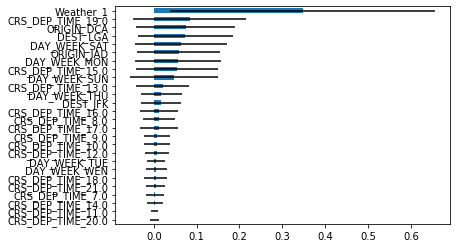

In [30]:
tree   = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=1)
forest = RandomForestClassifier(criterion='gini', max_depth = 3, n_estimators=500, random_state=1)
# adaboost = AdaBoostClassifier(base_estimator=tree, n_estimators=500, random_state=1)   # not covered in class

forest.fit(X_train, y_train)
importances  = forest.feature_importances_
std          = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
df           = pd.DataFrame({'feature':X_train.columns, 'importance': importances, 'std': std})
df           = df.sort_values('importance')

print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

Sensitivity for Decision Tree: 0.163
Accuracy for Decision Tree: 0.810
Sensitivity for Random Forest: 0.128
Accuracy for Random Forest: 0.830


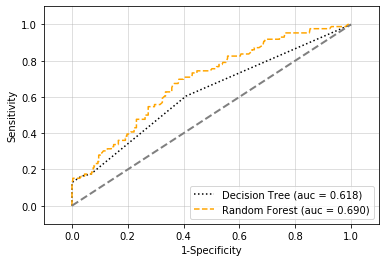

In [31]:
clf_labels  = ['Decision Tree', 'Random Forest']
all_clf      = [tree, forest]

colors       = ['black', 'orange', 'blue', 'green']
linestyles   = [':', '--', '-.', '-']

for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    clf.fit(X_train, y_train)
    y_pred   = clf.predict_proba(X_test)[:,1]
    y_p      = clf.predict(X_test)
    print('Sensitivity for %s: %.3f' % (label, recall_score(y_true=y_test, y_pred=y_p)))
    print('Accuracy for %s: %.3f' % (label, accuracy_score(y_true=y_test, y_pred=y_p)))
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc  = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.3f)'% (label, roc_auc))
    
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], linestyle='--', color='gray', linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

plt.show()

Random Forest Accuracies vs Model from step 5:
* Model from 5 accuracy = 0.80 gini
* Model from 9 accuracy = 0.83 gini
* Model from 9 accuracy = 0.83 entropy

#### Both hyperparameter tuning with gini and entropy results in a 3% improvement over the default model from step 5.